# Flipr Hackathon 6.0 Machine learning

# Covid19 Cases Prediction

## Problem Statement 1: Prediction of covid cases

## Model Development

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

## Reframing the Dataset

In [2]:
df = pd.read_excel('final_training_data2.xlsx')
df.head()

,Unnamed: 0,City,SWM,Population [2011],Sex Ratio,Median Age,Avg Temp,Toilets Avl,# of hospitals,Foreign Visitors,...,Punjab,Rajasthan,Sikkim,Tamil Nadu,Tamil nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,10,Kanpur,HIGH,0.222252,0.826296,0.812500,0.725,0.594714,0.591195,0.662594,...,0,0,0,0,0,0,0,1,0,0
1,11,Nagpur,MEDIUM,0.193345,0.842610,0.813673,0.875,0.440529,0.327044,0.941130,...,0,0,0,0,0,0,0,0,0,0
2,12,Indore,MEDIUM,0.157855,0.891555,0.815583,0.925,0.656388,0.477987,0.089945,...,0,0,0,0,0,0,0,0,0,0
3,14,Bhopal,LOW,0.144524,0.888676,0.815142,0.875,0.497797,0.452830,0.089945,...,0,0,0,0,0,0,0,0,0,0
4,15,Visakhapatnam,HIGH,0.138891,0.855086,0.812867,0.650,0.524229,0.320755,0.050772,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.drop(['Unnamed: 0','SWM','City'],axis = 1, inplace = True)

In [4]:
df.head()

,Population [2011],Sex Ratio,Median Age,Avg Temp,Toilets Avl,# of hospitals,Foreign Visitors,Covid Cases,SWM-HIGH,SWM-LOW,...,Punjab,Rajasthan,Sikkim,Tamil Nadu,Tamil nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,0.222252,0.826296,0.812500,0.725,0.594714,0.591195,0.662594,22413,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.193345,0.842610,0.813673,0.875,0.440529,0.327044,0.941130,44700,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.157855,0.891555,0.815583,0.925,0.656388,0.477987,0.089945,15764,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.144524,0.888676,0.815142,0.875,0.497797,0.452830,0.089945,12446,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.138891,0.855086,0.812867,0.650,0.524229,0.320755,0.050772,21374,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y_data = df['Covid Cases']
y_data.head()

0    22413
1    44700
2    15764
3    12446
4    21374
Name: Covid Cases, dtype: int64

In [6]:
x_data = df.drop(['Covid Cases'], axis =1)
x_data.head()

,Population [2011],Sex Ratio,Median Age,Avg Temp,Toilets Avl,# of hospitals,Foreign Visitors,SWM-HIGH,SWM-LOW,SWM-MEDIUM,...,Punjab,Rajasthan,Sikkim,Tamil Nadu,Tamil nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,0.222252,0.826296,0.812500,0.725,0.594714,0.591195,0.662594,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.193345,0.842610,0.813673,0.875,0.440529,0.327044,0.941130,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.157855,0.891555,0.815583,0.925,0.656388,0.477987,0.089945,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.144524,0.888676,0.815142,0.875,0.497797,0.452830,0.089945,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.138891,0.855086,0.812867,0.650,0.524229,0.320755,0.050772,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train Val split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=3)

In [8]:
x_train.head()

,Population [2011],Sex Ratio,Median Age,Avg Temp,Toilets Avl,# of hospitals,Foreign Visitors,SWM-HIGH,SWM-LOW,SWM-MEDIUM,...,Punjab,Rajasthan,Sikkim,Tamil Nadu,Tamil nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
668,0.003404,0.825336,0.87500,1.000,0.312775,0.176101,0.060830,0,0,1,...,0,0,0,0,0,0,0,0,0,0
264,0.032384,0.866603,0.71875,0.650,0.497797,0.427673,0.035815,0,0,1,...,0,0,0,0,0,0,0,0,0,0
559,0.004184,0.876200,0.87500,0.725,0.251101,0.169811,0.089945,1,0,0,...,0,0,0,0,0,0,0,0,0,0
738,0.002969,0.906910,0.71875,0.900,0.273128,0.138365,0.317949,0,0,1,...,0,0,0,0,0,0,0,0,0,1
78,0.040402,0.833973,0.90625,0.750,0.643172,0.528302,0.941130,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
x_test.head()

,Population [2011],Sex Ratio,Median Age,Avg Temp,Toilets Avl,# of hospitals,Foreign Visitors,SWM-HIGH,SWM-LOW,SWM-MEDIUM,...,Punjab,Rajasthan,Sikkim,Tamil Nadu,Tamil nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
112,0.028277,0.882917,0.90625,0.650,0.612335,0.383648,0.197181,0,1,0,...,0,0,0,0,0,0,0,0,0,0
635,0.003658,0.872361,0.71875,1.000,0.436123,0.188679,0.035815,0,0,1,...,0,0,0,0,0,0,0,0,0,0
663,0.003437,0.830134,0.81250,0.975,0.431718,0.062893,0.060830,1,0,0,...,0,0,0,0,0,0,0,0,0,0
232,0.014868,0.812860,0.81250,0.625,0.577093,0.610063,0.060830,0,1,0,...,0,0,0,0,0,0,0,0,0,0
188,0.017747,0.855086,0.71875,0.750,0.497797,0.496855,0.308591,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
len(x_test)

111

In [11]:
y_train.head()

668     2406
264     8300
559     2554
738     2172
78     10070
Name: Covid Cases, dtype: int64

In [12]:
y_test.head()

112    10662
635     2089
663     2247
232     8800
188     1845
Name: Covid Cases, dtype: int64

### First we'll Try Linear Regression With All the features

The R-square is:  0.6432875378541507
The mean square error of price and predicted value is:  8187357.937996821


/home/pranesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/pranesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Covid Cases', ylabel='Density'>

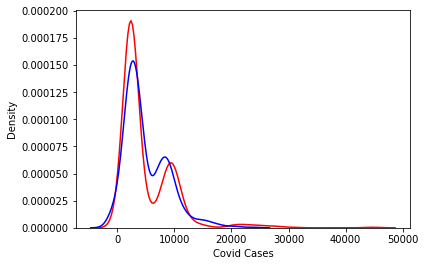

In [13]:
lm = LinearRegression()

lm.fit(x_train,y_train)

Yhat=lm.predict(x_train)

print('The R-square is: ', lm.score(x_train, y_train))
mse = mean_squared_error(y_train, Yhat)
print('The mean square error of price and predicted value is: ', mse)


ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Predicted Values" , ax=ax1)

The R-square is:  -1.73826303242516e+22
The mean square error of price and predicted value is:  4.0306618246213e+29


/home/pranesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/pranesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Covid Cases', ylabel='Density'>

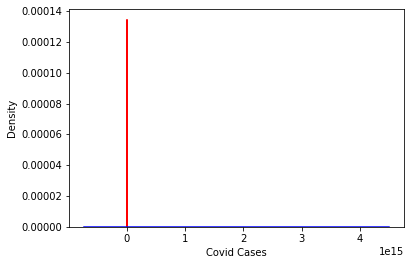

In [14]:
Yhat=lm.predict(x_test)


print('The R-square is: ', lm.score(x_test, y_test))
mse = mean_squared_error(y_test, Yhat)
print('The mean square error of price and predicted value is: ', mse)


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Predicted Values" , ax=ax1)

#### R2 Scores for Training set and validation Set are 0.8877725748416626 and 0.8840197612322355. And Difference Between CrossVal loss and Train Loss is 1123.4287134482984

### Training The Linear Regression Model on Correlated Features

#### It Shows that model is training only on 2 features...... So let us try some another non-linear approach

### Random Forest Regressor with all the parameters

The R-square is:  0.9206984282727091
The mean square error of price and predicted value is:  1820150.4620031796


/home/pranesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/pranesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Covid Cases', ylabel='Density'>

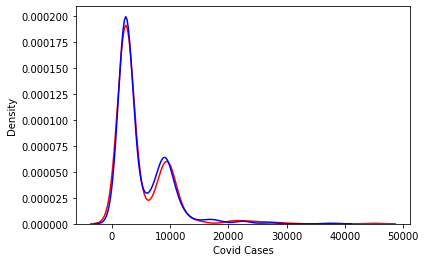

In [197]:
lm = RandomForestRegressor(n_estimators = 10, random_state = 0)

lm.fit(x_train,y_train)

Yhat=lm.predict(x_train)

print('The R-square is: ', lm.score(x_train, y_train))
mse = mean_squared_error(y_train, Yhat)
print('The mean square error of price and predicted value is: ', mse)


ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Predicted Values" , ax=ax1)

The R-square is:  0.5967139787265956
The mean square error of price and predicted value is:  9351344.071801802


/home/pranesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/pranesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Covid Cases', ylabel='Density'>

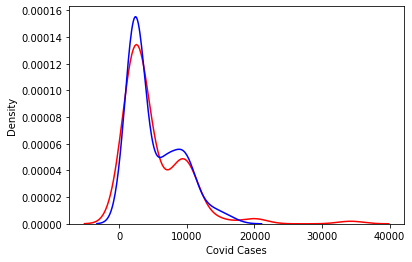

In [198]:
Yhat=lm.predict(x_test)


print('The R-square is: ', lm.score(x_test, y_test))
mse = mean_squared_error(y_test, Yhat)
print('The mean square error of price and predicted value is: ', mse)


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Predicted Values" , ax=ax1)

In [199]:
def CalcRMSE(output2,target2):
    error = output2-target2
    error_sq = error**2
    Sum_error_sq = np.sum(error_sq)
    variance = Sum_error_sq/len(output2)
    RMSE = variance**0.5
    return RMSE

In [200]:
print('The mean square error of price and predicted value is: ', mse)
print("RMSE: ",CalcRMSE(y_test, Yhat))

The mean square error of price and predicted value is:  9351344.071801802
RMSE:  3057.9967416270742


## GRADIENT BOOSTING

The R-square is:  0.9953268744832343
The mean square error of price and predicted value is:  107258.80185061689


/home/pranesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/pranesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Covid Cases', ylabel='Density'>

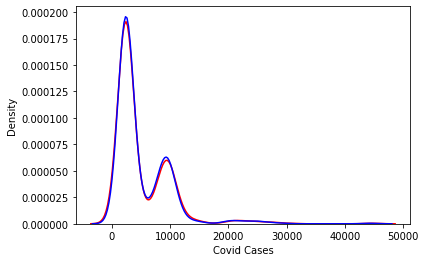

In [201]:
from sklearn import ensemble

params = {'n_estimators': 625,
          'max_depth': 7,
          'min_samples_split': 7,
          'learning_rate': 0.01,
          'loss': 'ls'}

lm = ensemble.GradientBoostingRegressor(**params)

lm.fit(x_train,y_train)

Yhat=lm.predict(x_train)

print('The R-square is: ', lm.score(x_train, y_train))
mse = mean_squared_error(y_train, Yhat)
print('The mean square error of price and predicted value is: ', mse)


ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Predicted Values" , ax=ax1)

In [202]:
print('The mean square error of price and predicted value is: ', mse)
print("RMSE: ",CalcRMSE(y_train, Yhat))

The mean square error of price and predicted value is:  107258.80185061689
RMSE:  327.50389593196735


The R-square is:  0.6160192968512226
The mean square error of price and predicted value is:  8903694.85344075


/home/pranesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/pranesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Covid Cases', ylabel='Density'>

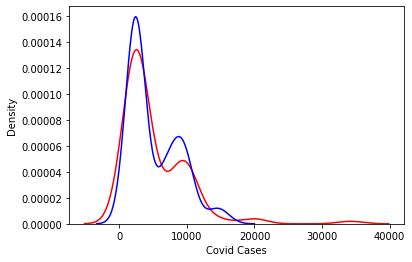

In [203]:
Yhat=lm.predict(x_test)


print('The R-square is: ', lm.score(x_test, y_test))
mse = mean_squared_error(y_test, Yhat)
print('The mean square error of price and predicted value is: ', mse)


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Predicted Values" , ax=ax1)

In [204]:
print('The mean square error of price and predicted value is: ', mse)
print("RMSE: ",CalcRMSE(y_test, Yhat))

The mean square error of price and predicted value is:  8903694.85344075
RMSE:  2983.905972620577


## SVM regressor

The R-square is:  -0.34785909030958306
The mean square error of price and predicted value is:  30936415.161843397


/home/pranesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/pranesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Covid Cases', ylabel='Density'>

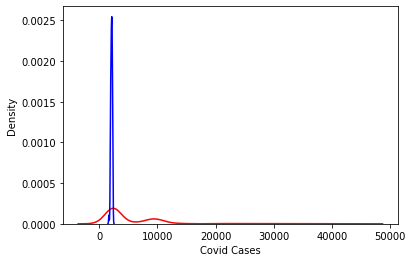

In [24]:
import sklearn

lm = sklearn.svm.LinearSVR(random_state=0, tol=1e-5)

lm.fit(x_train,y_train)

Yhat=lm.predict(x_train)

print('The R-square is: ', lm.score(x_train, y_train))
mse = mean_squared_error(y_train, Yhat)
print('The mean square error of price and predicted value is: ', mse)


ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Predicted Values" , ax=ax1)

### We have came accross the coclusion that Gradient Boosting ALgorithm is the best method to fit our data

The R-square is:  0.9929334313973398
The mean square error of price and predicted value is:  162463.8004209902


/home/pranesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/pranesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Covid Cases', ylabel='Density'>

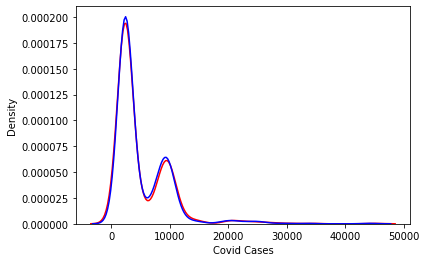

In [207]:
from sklearn import ensemble

params = {'n_estimators': 625,
          'max_depth': 7,
          'min_samples_split': 7,
          'learning_rate': 0.01,
          'loss': 'ls'}

lm = ensemble.GradientBoostingRegressor(**params)

lm.fit(x_data,y_data)

Yhat=lm.predict(x_data)

print('The R-square is: ', lm.score(x_data, y_data))
mse = mean_squared_error(y_data, Yhat)
print('The mean square error of price and predicted value is: ', mse)


ax1 = sns.distplot(y_data, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Predicted Values" , ax=ax1)

In [209]:
import pickle
filename = 'model.sav'
pickle.dump(lm, open(filename, 'wb'))